In [177]:
from PythonHead import *
import sklearn
from sklearn import cluster
import seaborn as sns
from sklearn.decomposition import PCA


In [178]:
data = pd.read_csv("Data.csv",header=None,names=['Person','Football','Archery','Opening','FirstGold','Skate','HorseRiding',
                                                 'Gymnastics','Triathlon','TableTennis','Swimming','Judo','100m','Cycling',
                                                 'Diving','Weightlifting','MarathonSwimming','BreakDance','Basketball','Final'])

In [179]:
def clean(data,case):

    # here there's a dirt approximation, because answers that are not numbers need to be transformed into numbers, but the distances 
    # are not well defined. Is betting "Brazil" farther from betting "Germany" or "UK"? Doesn't make sense
    # So I put the most common bets are the central numbers just to make this effect smaller and be a tiny bit conservative
    
    if case == 'Archery':
        for i in range(len(data)):
            if data[i] == 'Nenhum/None':
                data[i] = 0
            elif data[i] == 'Olímpico/Olympic':
                data[i] = 1
            else:
                data[i] = 2
    elif case == 'Opening':
        for i in range(len(data)):
            if data[i] == 'Homem/Man':
                data[i] = 0
            elif data[i] == 'Mulher/Woman':
                data[i] = 1
            elif data[i] == 'Múltiplas/Multiple':
                data[i] = 2
            else:
                data[i] = 3
    elif case == 'HorseRiding':
        for i in range(len(data)):
            data[i] = int(data[i][0])
    elif case == 'Swimming' or case == 'Cycling' or case == 'BreakDance' or case == 'Basketball':
        for i in range(len(data)):
            if data[i] == 'Sim/Yes':
                data[i] = 1
            else:
                data[i] = 0
    elif case == 'Triathlon':
        for i in range(len(data)):
            if data[i] == 'Natação/Swimming':
                data[i] = 0
            elif data[i] == 'Ciclismo/Cycling':
                data[i] = 1
            else:
                data[i] = 2

    elif case == 'Final':
        for i in range(len(data)):
            data[i] = int(data[i][:-5])

    elif case == 'FirstGold':
        for i in range(len(data)):
            if data[i] == 'China':
                data[i] = 2
            elif data[i] == 'EUA':
                data[i] = 3
            elif data[i] == 'França':
                data[i] = 1
            elif data[i] == 'Alemanha':
                data[i] = 4
            elif data[i] == 'Japão':
                data[i] = 0
            else:
                data[i] = 5
            
    elif case == 'Gymnastics':
        for i in range(len(data)):
            if data[i] == 'Grã-Bretanha':
                data[i] = 3
            elif data[i] == 'França':
                data[i] = 4
            elif data[i] == 'Brasil':
                data[i] = 2
            elif data[i] == 'Japão':
                data[i] = 1
            elif data[i] == 'Alemanha':
                data[i] = 5
            else:
                data[i] = 0

    else:
        print(f"CERTEZA QUE QUERIA ARRUMAR O CASO {case}??")

    # gotta give a scale for each betting, 0.02s difference in the 100m sprint is not 100x smaller than a 2 goals difference in the football
    # decided to use the variance as the scale (how many sigma difference basically)
    
    std = np.std(np.array(data))
    data = np.array(data)/std
    
    return(data)
            
        
        

In [180]:
for c in ['Archery','Opening','HorseRiding','Swimming','Cycling','BreakDance','Basketball','Triathlon','Final','FirstGold','Gymnastics']:
    data[c] = clean(data[c].array,c)

In [181]:
data

,Person,Football,Archery,Opening,FirstGold,Skate,HorseRiding,Gymnastics,Triathlon,TableTennis,Swimming,Judo,100m,Cycling,Diving,Weightlifting,MarathonSwimming,BreakDance,Basketball,Final
0,-Zizi,3,0.0,0.0,2.137562,14,3.113506,3.525636,2.386332,3,0.0,1,9.80,3.103761,92,3,1,2.623157,2.823546,1.0511
1,Ana,4,3.050217,0.0,2.137562,16,3.113506,1.762818,0.0,1,0.0,4,9.68,3.103761,94,4,2,2.623157,2.823546,1.0511
2,André el Hobbit,2,1.525108,2.548408,3.206343,16,3.113506,3.525636,0.0,3,0.0,3,9.65,3.103761,96,2,2,2.623157,2.823546,0.700733
3,Bennie,1,1.525108,2.548408,5.343904,18,3.113506,1.762818,1.193166,5,0.0,4,9.89,3.103761,86,4,24,2.623157,2.823546,0.700733
4,Bozzo,4,1.525108,2.548408,2.137562,17,3.113506,1.762818,0.0,3,0.0,4,9.60,0.0,97,2,2,2.623157,2.823546,0.700733
5,Cabeça,1,1.525108,1.274204,5.343904,16,3.113506,1.762818,1.193166,5,2.137562,2,9.82,3.103761,95,3,2,2.623157,2.823546,-1.401466
6,Caio,2,0.0,0.0,2.137562,14,3.113506,3.525636,2.386332,2,0.0,2,9.73,3.103761,95,1,2,0.0,2.823546,0.350367
7,Cynric,0,1.525108,0.0,1.068781,14,3.113506,2.644227,2.386332,3,0.0,4,9.80,3.103761,96,0,0,2.623157,2.823546,0.700733
8,Dona Marisa,4,1.525108,1.274204,3.206343,16,1.556753,1.762818,1.193166,2,2.137562,1,9.82,3.103761,97,2,2,2.623157,0.0,-0.350367
9,Dona Nádia,0,0.0,1.274204,3.206343,16,3.113506,1.762818,0.0,2,0.0,2,9.79,3.103761,90,3,1,0.0,2.823546,1.751833


In [182]:
n_clusters = 5

In [183]:
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters).fit(data.iloc[:,1:])
rec_id = kmeans.predict(data.iloc[:,1:])
data['Cluster'] = rec_id

In [184]:
data

,Person,Football,Archery,Opening,FirstGold,Skate,HorseRiding,Gymnastics,Triathlon,TableTennis,...,Judo,100m,Cycling,Diving,Weightlifting,MarathonSwimming,BreakDance,Basketball,Final,Cluster
0,-Zizi,3,0.0,0.0,2.137562,14,3.113506,3.525636,2.386332,3,...,1,9.80,3.103761,92,3,1,2.623157,2.823546,1.0511,0
1,Ana,4,3.050217,0.0,2.137562,16,3.113506,1.762818,0.0,1,...,4,9.68,3.103761,94,4,2,2.623157,2.823546,1.0511,1
2,André el Hobbit,2,1.525108,2.548408,3.206343,16,3.113506,3.525636,0.0,3,...,3,9.65,3.103761,96,2,2,2.623157,2.823546,0.700733,1
3,Bennie,1,1.525108,2.548408,5.343904,18,3.113506,1.762818,1.193166,5,...,4,9.89,3.103761,86,4,24,2.623157,2.823546,0.700733,2
4,Bozzo,4,1.525108,2.548408,2.137562,17,3.113506,1.762818,0.0,3,...,4,9.60,0.0,97,2,2,2.623157,2.823546,0.700733,1
5,Cabeça,1,1.525108,1.274204,5.343904,16,3.113506,1.762818,1.193166,5,...,2,9.82,3.103761,95,3,2,2.623157,2.823546,-1.401466,1
6,Caio,2,0.0,0.0,2.137562,14,3.113506,3.525636,2.386332,2,...,2,9.73,3.103761,95,1,2,0.0,2.823546,0.350367,1
7,Cynric,0,1.525108,0.0,1.068781,14,3.113506,2.644227,2.386332,3,...,4,9.80,3.103761,96,0,0,2.623157,2.823546,0.700733,1
8,Dona Marisa,4,1.525108,1.274204,3.206343,16,1.556753,1.762818,1.193166,2,...,1,9.82,3.103761,97,2,2,2.623157,0.0,-0.350367,1
9,Dona Nádia,0,0.0,1.274204,3.206343,16,3.113506,1.762818,0.0,2,...,2,9.79,3.103761,90,3,1,0.0,2.823546,1.751833,0


In [185]:
pca=PCA(n_components=2)

reduced = pca.fit_transform(data.iloc[:,1:-1])

reduced_dataset = pd.DataFrame(np.column_stack([reduced, data.Cluster]), columns=['Comp1','Comp2','Cluster'])

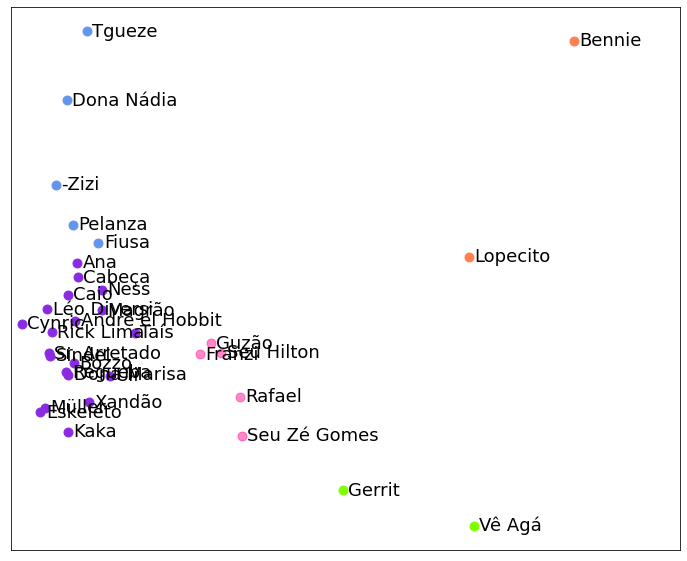

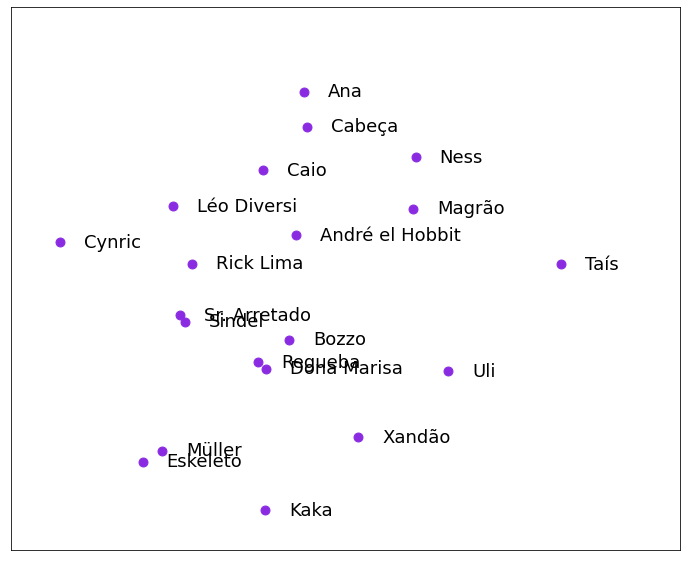

In [199]:
plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==0],reduced_dataset['Comp2'][reduced_dataset['Cluster']==0],s=80,color='cornflowerblue')
plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==1],reduced_dataset['Comp2'][reduced_dataset['Cluster']==1],s=80,color='blueviolet')
plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==2],reduced_dataset['Comp2'][reduced_dataset['Cluster']==2],s=80,color='coral')
plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==3],reduced_dataset['Comp2'][reduced_dataset['Cluster']==3],s=80,color='deeppink',alpha=0.5)
plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==4],reduced_dataset['Comp2'][reduced_dataset['Cluster']==4],s=80,color='chartreuse')
for i in range(len(reduced_dataset)):
    plt.text(reduced_dataset['Comp1'][i]+0.25,reduced_dataset['Comp2'][i],data['Person'][i],ha='left',va='center',size=18)
plt.xlim(-6,25)
plt.xticks([])
plt.yticks([])
plt.show()

#plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==0],reduced_dataset['Comp2'][reduced_dataset['Cluster']==0],s=80,color='cornflowerblue')
plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==1],reduced_dataset['Comp2'][reduced_dataset['Cluster']==1],s=80,color='blueviolet')
#plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==2],reduced_dataset['Comp2'][reduced_dataset['Cluster']==2],s=80,color='coral')
#plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==3],reduced_dataset['Comp2'][reduced_dataset['Cluster']==3],s=80,color='deeppink',alpha=0.5)
#plt.scatter(reduced_dataset['Comp1'][reduced_dataset['Cluster']==4],reduced_dataset['Comp2'][reduced_dataset['Cluster']==4],s=80,color='chartreuse')
for i in range(len(reduced_dataset)):
    if (reduced_dataset['Cluster'][i] == 1):
        plt.text(reduced_dataset['Comp1'][i]+0.25,reduced_dataset['Comp2'][i],data['Person'][i],ha='left',va='center',size=18)
plt.xlim(-6,1)
plt.ylim(-3.5,2.5)
plt.xticks([])
plt.yticks([])
plt.show()